# 第6回レポート

学生番号：以下のセルに学生番号を記入してください．

氏名：以下のセルに氏名を記入してください．

以下のセルでは，本課題を実施するうえで必要なライブラリの読み込みなどを行ってください．

In [5]:
# numpy, scipy, pandasのインポート
import numpy as np
import numpy.random as random
import scipy as sp
from scipy import interpolate
import pandas as pd
from pandas import Series, DataFrame
# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
# 小数第3位まで表示
%precision 3

'%.3f'

#### <問題 1 >
以下に示すsample_namesとdataという2つの配列があるとします。ブールインデックス参照をつかって、dataから、sample_namesのc以外に該当するデータを抽出してください。

In [2]:
# データの準備
sample_names = np.array(['a','b','c','d','a'])
random.seed(0)
data = random.randn(5,5)

print(sample_names)
print(data)

['a' 'b' 'c' 'd' 'a']
[[ 1.764  0.4    0.979  2.241  1.868]
 [-0.977  0.95  -0.151 -0.103  0.411]
 [ 0.144  1.454  0.761  0.122  0.444]
 [ 0.334  1.494 -0.205  0.313 -0.854]
 [-2.553  0.654  0.864 -0.742  2.27 ]]


#### 解答と実行結果

In [3]:
data[sample_names != 'c']

array([[ 1.764,  0.4  ,  0.979,  2.241,  1.868],
       [-0.977,  0.95 , -0.151, -0.103,  0.411],
       [ 0.334,  1.494, -0.205,  0.313, -0.854],
       [-2.553,  0.654,  0.864, -0.742,  2.27 ]])

#### <問題 2>

以下のデータに対して,線形補間，2次元のスプライン補間，3次元のスプライン補間の計算をして，グラフを描いてください．

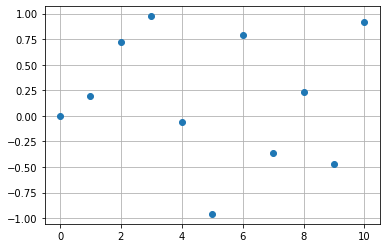

In [4]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.sin(x**2/5.0)
plt.plot(x,y,'o')
plt.grid(True)

#### 解答と実行結果

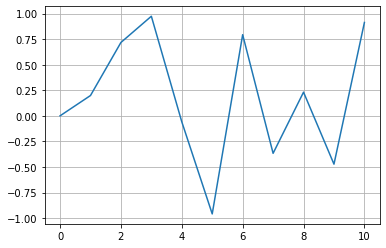

In [7]:
# 線形補間。interp1dのパラメータとして「linear」を指定する
f = interpolate.interp1d(x, y,'linear')
plt.plot(x,f(x),'-')
plt.grid(True)

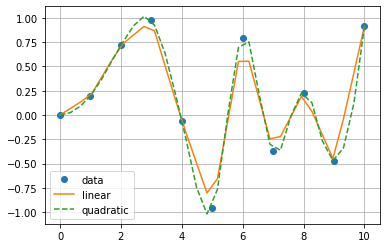

In [13]:
# スプライン2次補間を計算してf2として追加する。パラメータに「cubic」を指定する
f2 = interpolate.interp1d(x, y,'quadratic')
#曲線を出すために、xの値を細かくする。
xnew= np.linspace(0, 10, num=30, endpoint=True)
# グラフ化。fを直線で描き、f2を点線で描く
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
# 凡例
plt.legend(['data', 'linear', 'quadratic'], loc='best')
plt.grid(True)

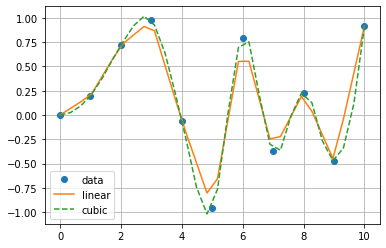

In [12]:
# スプライン3次補間を計算してf2として追加する。パラメータに「cubic」を指定する
f3 = interpolate.interp1d(x, y,'cubic')
#曲線を出すために、xの値を細かくする。
xnew= np.linspace(0, 10, num=30, endpoint=True)
# グラフ化。fを直線で描き、f2を点線で描く
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
# 凡例
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.grid(True)

#### <問題 3>

次のデータに対して、`Wakayama`の列だけ抜き出してみましょう。

In [14]:
hier_data_frame1 = DataFrame(
    np.arange(12).reshape((3,4)),
    index = [['c','d','d'],[1,2,1]],
    columns = [
        ['Wakayama','Nagoya','Hokkaido','Wakayama'],
        ['Yellow','Yellow','Red','Blue']
    ]
)

hier_data_frame1.index.names = ['key1','key2']
hier_data_frame1.columns.names = ['city','color']
hier_data_frame1

city      Wakayama Nagoya Hokkaido Wakayama
color       Yellow Yellow      Red     Blue
key1 key2                                  
c    1           0      1        2        3
d    2           4      5        6        7
     1           8      9       10       11

#### 解答と実行結果

In [17]:
hier_data_frame1['Wakayama']

color      Yellow  Blue
key1 key2              
c    1          0     3
d    2          4     7
     1          8    11

#### <問題 4>

<問題 3>のデータに対して、`city`をまとめて列同士の平均値を出してください。

#### 解答と実行結果

In [19]:

print('平均:',hier_data_frame1.mean())

平均: city      color 
Wakayama  Yellow    4.0
Nagoya    Yellow    5.0
Hokkaido  Red       6.0
Wakayama  Blue      7.0
dtype: float64
